In [1]:
import pandas as pd

In [2]:
dataset_build = pd.read_csv("../../feature_engineering/datasets/built_dataset.csv")

In [3]:
dataset_build.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440716 entries, 0 to 440715
Data columns (total 7 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   item_name                  440716 non-null  object 
 1   category_name              440716 non-null  object 
 2   date                       440716 non-null  object 
 3   time                       440716 non-null  int64  
 4   item_code                  440716 non-null  int64  
 5   quantity_sold_kg           440716 non-null  float64
 6   unit_selling_price_rmb/kg  440716 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 23.5+ MB


In [4]:
dataset_build.head(3)

,item_name,category_name,date,time,item_code,quantity_sold_kg,unit_selling_price_rmb/kg
0,green hot peppers,capsicum,2021-01-01,9,102900005116226,1.1,25.8
1,green hot peppers,capsicum,2021-01-01,9,102900005116226,0.6,25.8
2,yunnan lettuces,flower,2021-01-01,9,102900005115984,0.5,6.0


In [5]:
Wholesale_Price_data = pd.read_csv("../../feature_engineering/datasets/wholesale_price.csv")
Wholesale_Price_data.head()

,Date,Item Code,Wholesale Price (RMB/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [6]:
Wholesale_Price_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55982 entries, 0 to 55981
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      55982 non-null  object 
 1   Item Code                 55982 non-null  int64  
 2   Wholesale Price (RMB/kg)  55982 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.3+ MB


In [7]:
Wholesale_Price_data.rename(str.lower, axis='columns', inplace=True)

Wholesale_Price_data.rename(lambda x: x.replace(" ", "_"), axis='columns', inplace=True)
Wholesale_Price_data.columns

# Check for duplicates in the 'Item Code' column
duplicates_counts = Wholesale_Price_data['item_code'].duplicated().sum()

# Print the count of duplicates
print("Number of duplicate entries in 'Item Code':", duplicates_counts)

# Optionally, you can print the actual duplicated rows
duplicates = Wholesale_Price_data[Wholesale_Price_data['item_code'].duplicated(keep=False)]
print("Duplicate entries:")
print(duplicates)


Number of duplicate entries in 'Item Code': 55731
Duplicate entries:
             date        item_code  wholesale_price_(rmb/kg)
0      2020-07-01  102900005115762                      3.88
1      2020-07-01  102900005115779                      6.72
2      2020-07-01  102900005115786                      3.19
3      2020-07-01  102900005115793                      9.24
4      2020-07-01  102900005115823                      7.03
...           ...              ...                       ...
55977  2023-06-30  102900051000944                     18.00
55978  2023-06-30  102900051004294                      6.45
55979  2023-06-30  102900051010455                      4.48
55980  2023-06-30  106949711300259                      1.45
55981  2023-06-30  106971533450003                      1.95

[55974 rows x 3 columns]


In [8]:
loss_rate = pd.read_csv('../../feature_engineering/datasets/loss_rate.csv')
(loss_rate.head())

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom (1),10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


In [9]:
def split_name(data):
    if '(' in data:
        return data.split('(')[0][:-1]
    return data

loss_rate['Item Name'] = loss_rate['Item Name'].apply(split_name)
loss_rate.head()

,Item Code,Item Name,Loss Rate (%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom,10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


In [10]:
loss_rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Item Code      251 non-null    int64  
 1   Item Name      251 non-null    object 
 2   Loss Rate (%)  251 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.0+ KB


In [11]:
loss_rate.rename(str.lower, axis='columns', inplace=True)

loss_rate.rename(lambda x: x.replace(" ", "_"), axis='columns', inplace=True)
loss_rate.columns

# Check for duplicates in the 'Item Code' column
duplicates_count = loss_rate['item_code'].duplicated().sum()

# Print the count of duplicates
print("Number of duplicate entries in 'Item Code':", duplicates_count)

# Optionally, you can print the actual duplicated rows
duplicates = loss_rate[loss_rate['item_code'].duplicated(keep=False)]
print("Duplicate entries:")
print(duplicates)

Number of duplicate entries in 'Item Code': 0
Duplicate entries:
Empty DataFrame
Columns: [item_code, item_name, loss_rate_(%)]
Index: []


In [12]:
Wholesale_Price_data_drop = Wholesale_Price_data.drop_duplicates()
Wholesale_Price_data_drop

,date,item_code,wholesale_price_(rmb/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03
...,...,...,...
55977,2023-06-30,102900051000944,18.00
55978,2023-06-30,102900051004294,6.45
55979,2023-06-30,102900051010455,4.48
55980,2023-06-30,106949711300259,1.45


In [13]:
loss_rate_drop = loss_rate.drop_duplicates()
loss_rate_drop

,item_code,item_name,loss_rate_(%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom,10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78
...,...,...,...
246,106971533455008,Haixian Mushroom,1.30
247,106971563780002,Xianzongye,0.00
248,106972776821582,Xianzongye,9.43
249,106973223300667,Chinese Caterpillar Fungus Flowers,11.13


In [14]:
from matplotlib import pyplot as plt

<BarContainer object of 6 artists>

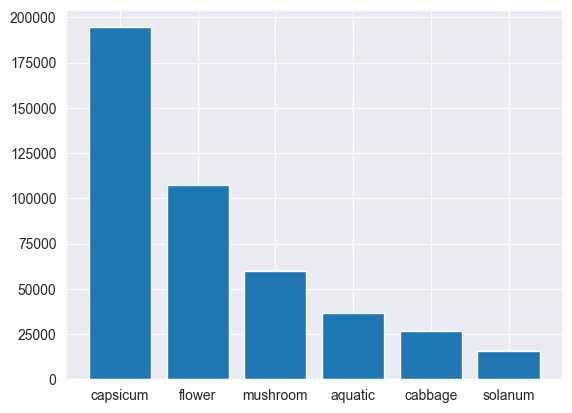

In [15]:
plt.bar(dataset_build['category_name'].unique(), dataset_build['category_name'].value_counts())

In [16]:
#Wholesale_Price_data_drop.columns = Wholesale_Price_data_drop.columns.str.replace(" ", "_")
Wholesale_Price_data_drop.head()

,date,item_code,wholesale_price_(rmb/kg)
0,2020-07-01,102900005115762,3.88
1,2020-07-01,102900005115779,6.72
2,2020-07-01,102900005115786,3.19
3,2020-07-01,102900005115793,9.24
4,2020-07-01,102900005115823,7.03


In [17]:
#loss_rate_drop.columns = loss_rate_drop.columns.str.replace(" ", "_")
loss_rate_drop.head()

,item_code,item_name,loss_rate_(%)
0,102900005115168,Niushou Shengcai,4.39
1,102900005115199,Sichuan Red Cedar,10.46
2,102900005115250,Xixia Black Mushroom,10.80
3,102900005115625,Local Xiaomao Cabbage,0.18
4,102900005115748,White Caitai,8.78


In [18]:
dataset_build.dtypes

item_name                     object
category_name                 object
date                          object
time                           int64
item_code                      int64
quantity_sold_kg             float64
unit_selling_price_rmb/kg    float64
dtype: object

In [19]:
#Wholesale_Price_data_drop.columns = [col.replace('_', ' ') for col in Wholesale_Price_data_drop.columns]

In [20]:

# Convert 'Date' column to object type
Wholesale_Price_data_drop['date'] = Wholesale_Price_data_drop['date'].astype(str)

In [21]:
Wholesale_Price_data_drop.dtypes

date                         object
item_code                     int64
wholesale_price_(rmb/kg)    float64
dtype: object

In [22]:
#loss_rate_drop.columns = [col.replace('_', ' ') for col in loss_rate_drop.columns]

In [23]:
loss_rate_drop.dtypes

item_code          int64
item_name         object
loss_rate_(%)    float64
dtype: object

In [24]:
print(Wholesale_Price_data_drop['date'].min(), Wholesale_Price_data_drop['date'].max())

2020-07-01 2023-06-30


In [25]:
cf = Wholesale_Price_data_drop[(Wholesale_Price_data_drop['date'] >= '2021-01-01') & (Wholesale_Price_data_drop['date'] <= '2022-12-31')]
cf.shape

(39491, 3)

In [26]:
sales_wholesale_df = pd.merge(dataset_build, cf, on=['item_code', 'date'], how='inner')
sales_wholesale_df.head()

,item_name,category_name,date,time,item_code,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg)
0,green hot peppers,capsicum,2021-01-01,9,102900005116226,1.1,25.8,15.21
1,green hot peppers,capsicum,2021-01-01,9,102900005116226,0.6,25.8,15.21
2,yunnan lettuces,flower,2021-01-01,9,102900005115984,0.5,6.0,3.19
3,xixia mushroom,mushroom,2021-01-01,9,102900005116530,0.4,18.0,13.00
4,paopaojiao,capsicum,2021-01-01,9,102900005117056,0.6,18.0,14.31


In [27]:
sales_wholesale_df.isnull().sum()

item_name                    0
category_name                0
date                         0
time                         0
item_code                    0
quantity_sold_kg             0
unit_selling_price_rmb/kg    0
wholesale_price_(rmb/kg)     0
dtype: int64

In [28]:
for i in range(sales_wholesale_df.shape[0]):
    for j in range(loss_rate_drop.shape[0]):
        if sales_wholesale_df['item_code'].iloc[i] == loss_rate_drop['item_code'].iloc[j]:
            sales_wholesale_df.at[i, 'item_name'] = loss_rate_drop['item_name'].iloc[j]
            sales_wholesale_df.at[i, 'loss_rate_(%)'] = loss_rate_drop['loss_rate_(%)'].iloc[j]
            break  # Break the inner loop once a match is found

# Display the merged DataFrame 'a'
sales_wholesale_cat_df = sales_wholesale_df
sales_wholesale_cat_df.head()

,item_name,category_name,date,time,item_code,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%)
0,Green Hot Peppers,capsicum,2021-01-01,9,102900005116226,1.1,25.8,15.21,6.72
1,Green Hot Peppers,capsicum,2021-01-01,9,102900005116226,0.6,25.8,15.21,6.72
2,Yunnan Lettuces,flower,2021-01-01,9,102900005115984,0.5,6.0,3.19,12.81
3,Xixia Mushroom,mushroom,2021-01-01,9,102900005116530,0.4,18.0,13.00,13.82
4,Paopaojiao,capsicum,2021-01-01,9,102900005117056,0.6,18.0,14.31,7.08


In [29]:
sales_wholesale_cat_df.isnull().sum()

item_name                    0
category_name                0
date                         0
time                         0
item_code                    0
quantity_sold_kg             0
unit_selling_price_rmb/kg    0
wholesale_price_(rmb/kg)     0
loss_rate_(%)                0
dtype: int64

In [30]:
data = sales_wholesale_cat_df
data.head()

,item_name,category_name,date,time,item_code,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%)
0,Green Hot Peppers,capsicum,2021-01-01,9,102900005116226,1.1,25.8,15.21,6.72
1,Green Hot Peppers,capsicum,2021-01-01,9,102900005116226,0.6,25.8,15.21,6.72
2,Yunnan Lettuces,flower,2021-01-01,9,102900005115984,0.5,6.0,3.19,12.81
3,Xixia Mushroom,mushroom,2021-01-01,9,102900005116530,0.4,18.0,13.00,13.82
4,Paopaojiao,capsicum,2021-01-01,9,102900005117056,0.6,18.0,14.31,7.08


In [31]:
data.isnull().sum()

item_name                    0
category_name                0
date                         0
time                         0
item_code                    0
quantity_sold_kg             0
unit_selling_price_rmb/kg    0
wholesale_price_(rmb/kg)     0
loss_rate_(%)                0
dtype: int64

In [32]:
data = data.drop_duplicates()
data

,item_name,category_name,date,time,item_code,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%)
0,Green Hot Peppers,capsicum,2021-01-01,9,102900005116226,1.1,25.8,15.21,6.72
1,Green Hot Peppers,capsicum,2021-01-01,9,102900005116226,0.6,25.8,15.21,6.72
2,Yunnan Lettuces,flower,2021-01-01,9,102900005115984,0.5,6.0,3.19,12.81
3,Xixia Mushroom,mushroom,2021-01-01,9,102900005116530,0.4,18.0,13.00,13.82
4,Paopaojiao,capsicum,2021-01-01,9,102900005117056,0.6,18.0,14.31,7.08
...,...,...,...,...,...,...,...,...,...
440709,Shanghai Green,flower,2022-12-31,21,102900011030141,1.0,2.3,1.80,9.43
440710,Zhijiang Qinggengsanhua,cabbage,2022-12-31,21,102900011034026,0.5,3.1,3.10,9.43
440711,Wawacai,flower,2022-12-31,21,102900005118831,1.0,3.5,2.99,2.48
440713,Yunnan Lettuce,flower,2022-12-31,21,102900011030059,1.0,2.7,2.58,9.43


In [33]:
#All Sales
data = data.assign(total_sales = data['quantity_sold_kg'] * data['unit_selling_price_rmb/kg'])
data.head()

,item_name,category_name,date,time,item_code,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%),total_sales
0,Green Hot Peppers,capsicum,2021-01-01,9,102900005116226,1.1,25.8,15.21,6.72,28.38
1,Green Hot Peppers,capsicum,2021-01-01,9,102900005116226,0.6,25.8,15.21,6.72,15.48
2,Yunnan Lettuces,flower,2021-01-01,9,102900005115984,0.5,6.0,3.19,12.81,3.00
3,Xixia Mushroom,mushroom,2021-01-01,9,102900005116530,0.4,18.0,13.00,13.82,7.20
4,Paopaojiao,capsicum,2021-01-01,9,102900005117056,0.6,18.0,14.31,7.08,10.80


In [34]:
## total sales per day
total_sales_per_day = data.groupby(['date'])['total_sales'].sum().reset_index()
total_sales_per_day

,date,total_sales
0,2021-01-01,2744.64
1,2021-01-02,2568.68
2,2021-01-03,2336.60
3,2021-01-04,2026.54
4,2021-01-05,1988.82
...,...,...
716,2022-12-27,992.93
717,2022-12-28,1108.06
718,2022-12-29,1100.41
719,2022-12-30,965.90


In [35]:
data['item_name'].nunique()

152

In [36]:
avg_selling_price_each_item = data.groupby(['item_name'])['unit_selling_price_rmb/kg'].mean().reset_index().rename(columns = {"unit_selling_price_rmb/kg" : "Avg Selling Price"})
avg_selling_price_each_item

,item_name,Avg Selling Price
0,7 Colour Pepper,21.511486
1,Agaricus Bisporus,8.200000
2,Aihao,6.000000
3,Amaranth,5.003500
4,Apricot Bao Mushroom,9.471558
...,...,...
147,Yuxingcao,11.734737
148,Zhijiang Qinggengsanhua,7.781023
149,Zhijiang Red Bolt,5.389917
150,Zhimaxiancai,6.000000


In [37]:
## average selling price for each item and each category

avg_selling_price_each_category = data.groupby(['category_name'])['unit_selling_price_rmb/kg'].mean().reset_index().rename(columns = {"unit_selling_price_rmb/kg" : "Avg Selling Price"})
avg_selling_price_each_category

,category_name,Avg Selling Price
0,aquatic,9.421263
1,cabbage,7.462561
2,capsicum,11.194056
3,flower,6.770301
4,mushroom,15.308589
5,solanum,8.905627


In [38]:
top_selling_item = avg_selling_price_each_item.nlargest(1, 'Avg Selling Price')
top_selling_item

,item_name,Avg Selling Price
9,Black Porcini,91.6


In [39]:
# Drop unnecessary columns (if any)
columns_to_drop = ['item_code']
data = data.drop(columns=columns_to_drop)
data.head()

,item_name,category_name,date,time,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%),total_sales
0,Green Hot Peppers,capsicum,2021-01-01,9,1.1,25.8,15.21,6.72,28.38
1,Green Hot Peppers,capsicum,2021-01-01,9,0.6,25.8,15.21,6.72,15.48
2,Yunnan Lettuces,flower,2021-01-01,9,0.5,6.0,3.19,12.81,3.00
3,Xixia Mushroom,mushroom,2021-01-01,9,0.4,18.0,13.00,13.82,7.20
4,Paopaojiao,capsicum,2021-01-01,9,0.6,18.0,14.31,7.08,10.80


In [40]:
data.isnull().sum()

item_name                    0
category_name                0
date                         0
time                         0
quantity_sold_kg             0
unit_selling_price_rmb/kg    0
wholesale_price_(rmb/kg)     0
loss_rate_(%)                0
total_sales                  0
dtype: int64

In [41]:
print(data.columns)

Index(['item_name', 'category_name', 'date', 'time', 'quantity_sold_kg',
       'unit_selling_price_rmb/kg', 'wholesale_price_(rmb/kg)',
       'loss_rate_(%)', 'total_sales'],
      dtype='object')


In [42]:
import pandas as pd

# Assuming 'filtered_data' is your preprocessed dataset
data['date'] = pd.to_datetime(data['date'])
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Aggregate data based on month and year
monthly_data = data.groupby(['year', 'month']).agg({
    'quantity_sold_kg': 'sum',
    'loss_rate_(%)': 'mean',
    'total_sales': 'sum'
}).reset_index()

desired_column_order = [
    'date', 
    'year', 
    'month',
    'time', 
    'category_name', 
    'item_name', 
    'quantity_sold_kg', 
    'unit_selling_price_rmb/kg', 
    'wholesale_price_(rmb/kg)', 
    'loss_rate_(%)', 
    'total_sales'
    # Add any other columns you want at the end
]
# Reorder the columns of merged_data based on the desired_column_order
data = data.reindex(columns=desired_column_order)

# Display the DataFrame with the reordered columns
data.head()

,date,year,month,time,category_name,item_name,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%),total_sales
0,2021-01-01,2021,1,9,capsicum,Green Hot Peppers,1.1,25.8,15.21,6.72,28.38
1,2021-01-01,2021,1,9,capsicum,Green Hot Peppers,0.6,25.8,15.21,6.72,15.48
2,2021-01-01,2021,1,9,flower,Yunnan Lettuces,0.5,6.0,3.19,12.81,3.00
3,2021-01-01,2021,1,9,mushroom,Xixia Mushroom,0.4,18.0,13.00,13.82,7.20
4,2021-01-01,2021,1,9,capsicum,Paopaojiao,0.6,18.0,14.31,7.08,10.80


In [43]:
# Drop unnecessary columns (if any)
columns_to_drops = ['year', 'date', 'time']
data = data.drop(columns=columns_to_drops)
data.head()

,month,category_name,item_name,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%),total_sales
0,1,capsicum,Green Hot Peppers,1.1,25.8,15.21,6.72,28.38
1,1,capsicum,Green Hot Peppers,0.6,25.8,15.21,6.72,15.48
2,1,flower,Yunnan Lettuces,0.5,6.0,3.19,12.81,3.00
3,1,mushroom,Xixia Mushroom,0.4,18.0,13.00,13.82,7.20
4,1,capsicum,Paopaojiao,0.6,18.0,14.31,7.08,10.80


In [44]:
data.isnull().sum()

month                        0
category_name                0
item_name                    0
quantity_sold_kg             0
unit_selling_price_rmb/kg    0
wholesale_price_(rmb/kg)     0
loss_rate_(%)                0
total_sales                  0
dtype: int64

Check Outliers and Outlier Handling

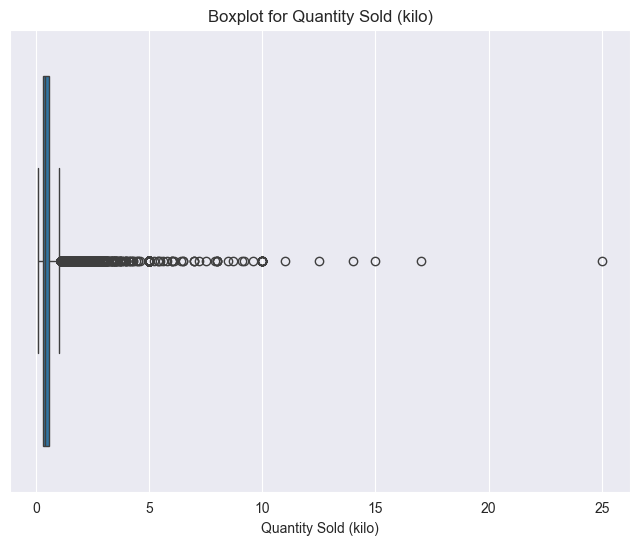

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Generate a boxplot specifically for the 'Quantity Sold (kilo)' column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=data['quantity_sold_kg'])  # Create the boxplot using seaborn
plt.title('Boxplot for Quantity Sold (kilo)')  # Set the title of the plot
plt.xlabel('Quantity Sold (kilo)')  # Set the label for the x-axis
plt.show()  # Display the plot


In [46]:
import numpy as np
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Quantity Sold (kilo)'
Q1 = data['quantity_sold_kg'].quantile(0.25)
Q3 = data['quantity_sold_kg'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = (data['quantity_sold_kg'] < lower_bound) | (data['quantity_sold_kg'] > upper_bound)

# Calculate the mean excluding outliers
mean_without_outliers = np.mean(data.loc[~outliers, 'quantity_sold_kg'])

# Replace outliers with the mean excluding outliers
data.loc[outliers, 'quantity_sold_kg'] = mean_without_outliers

# Filter out rows where 'Quantity Sold (kilo)' is outside the bounds
filtered_data = data[(data['quantity_sold_kg'] >= lower_bound) & (data['quantity_sold_kg'] <= upper_bound)]

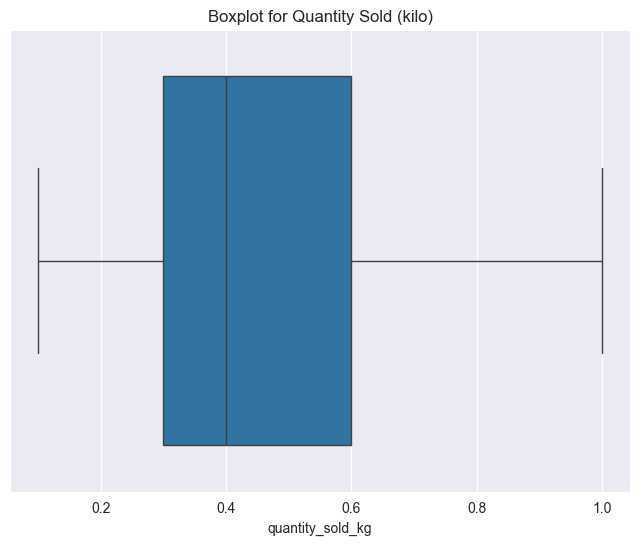

In [47]:
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=filtered_data['quantity_sold_kg'])  # Create the boxplot using seaborn
plt.title('Boxplot for Quantity Sold (kilo)')  # Set the title of the plot
plt.xlabel('quantity_sold_kg')  # Set the label for the x-axis
plt.show()

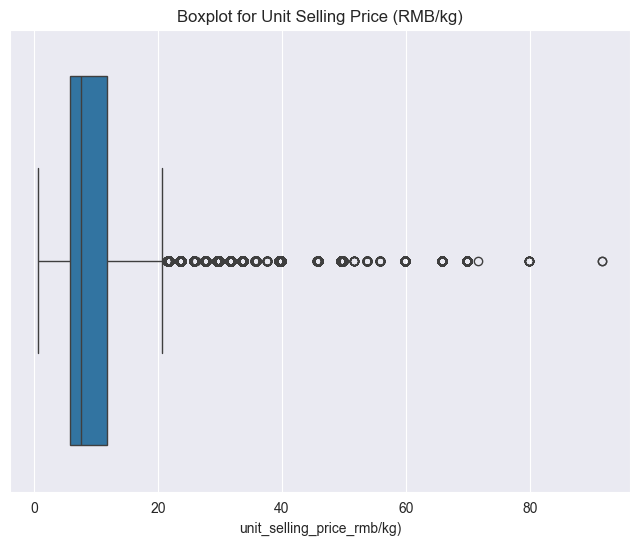

In [48]:
# Generate a boxplot specifically for the 'Unit Selling Price (RMB/kg)' column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=filtered_data['unit_selling_price_rmb/kg'])  # Create the boxplot using seaborn
plt.title('Boxplot for Unit Selling Price (RMB/kg)')  # Set the title of the plot
plt.xlabel('unit_selling_price_rmb/kg)')  # Set the label for the x-axis
plt.show()  # Display the plot

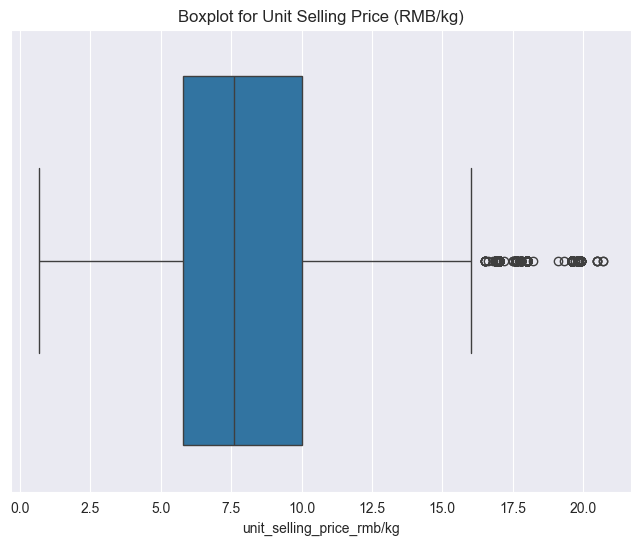

In [49]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Unit Selling Price (RMB/kg)'
Q1 = filtered_data['unit_selling_price_rmb/kg'].quantile(0.25)
Q3 = filtered_data['unit_selling_price_rmb/kg'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = (data['unit_selling_price_rmb/kg'] < lower_bound) | (data['unit_selling_price_rmb/kg'] > upper_bound)

# Replace outliers with the mean value without considering outliers in the mean calculation
mean_without_outliers = np.mean(data.loc[~outliers, 'unit_selling_price_rmb/kg'])
data.loc[outliers, 'unit_selling_price_rmb/kg'] = mean_without_outliers

# Filter out rows where 'Unit Selling Price (RMB/kg)' is outside the bounds
filtered_data = data[(data['unit_selling_price_rmb/kg'] >= lower_bound) & (data['unit_selling_price_rmb/kg'] <= upper_bound)]

plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=filtered_data['unit_selling_price_rmb/kg'])  # Create the boxplot using seaborn
plt.title('Boxplot for Unit Selling Price (RMB/kg)')  # Set the title of the plot
plt.xlabel('unit_selling_price_rmb/kg')  # Set the label for the x-axis
plt.show()


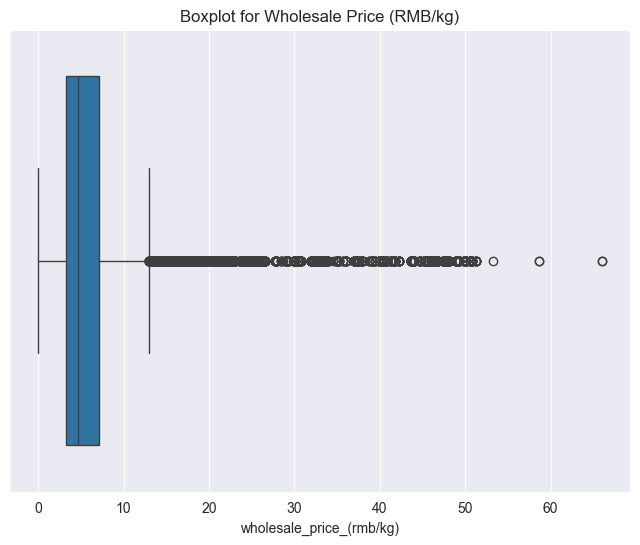

In [50]:
# Generate a boxplot specifically for the 'Wholesale Price (RMB/kg)' column
plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=filtered_data['wholesale_price_(rmb/kg)'])  # Create the boxplot using seaborn
plt.title('Boxplot for Wholesale Price (RMB/kg)')  # Set the title of the plot
plt.xlabel('wholesale_price_(rmb/kg)')  # Set the label for the x-axis
plt.show()  # Display the plot

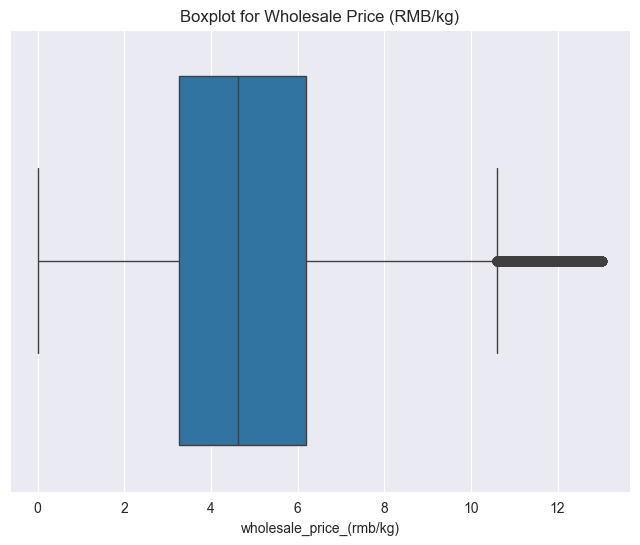

In [51]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'Wholesale Price (RMB/kg)'
Q1 = filtered_data['wholesale_price_(rmb/kg)'].quantile(0.25)
Q3 = filtered_data['wholesale_price_(rmb/kg)'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = (data['wholesale_price_(rmb/kg)'] < lower_bound) | (data['wholesale_price_(rmb/kg)'] > upper_bound)

# Replace outliers with the mean value without considering outliers in the mean calculation
mean_without_outliers = np.mean(data.loc[~outliers, 'wholesale_price_(rmb/kg)'])
data.loc[outliers, 'wholesale_price_(rmb/kg)'] = mean_without_outliers

# Filter out rows where 'Wholesale Price (RMB/kg)' is outside the bounds
filtered_data = data[(data['wholesale_price_(rmb/kg)'] >= lower_bound) & (data['wholesale_price_(rmb/kg)'] <= upper_bound)]

plt.figure(figsize=(8, 6))  # Set the figure size
sns.boxplot(x=filtered_data['wholesale_price_(rmb/kg)'])  # Create the boxplot using seaborn
plt.title('Boxplot for Wholesale Price (RMB/kg)')  # Set the title of the plot
plt.xlabel('wholesale_price_(rmb/kg)')  # Set the label for the x-axis
plt.show()

In [52]:
filtered_data.head()

,month,category_name,item_name,quantity_sold_kg,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%),total_sales
0,1,capsicum,Green Hot Peppers,0.453046,8.256712,5.072453,6.72,28.38
1,1,capsicum,Green Hot Peppers,0.600000,8.256712,5.072453,6.72,15.48
2,1,flower,Yunnan Lettuces,0.500000,6.000000,3.190000,12.81,3.00
3,1,mushroom,Xixia Mushroom,0.400000,18.000000,13.000000,13.82,7.20
4,1,capsicum,Paopaojiao,0.600000,18.000000,5.072453,7.08,10.80


In [53]:
filtered_data.shape

(296979, 8)

In [54]:
filtered_data = filtered_data.drop(columns=['quantity_sold_kg'])
filtered_data.head(3)

,month,category_name,item_name,unit_selling_price_rmb/kg,wholesale_price_(rmb/kg),loss_rate_(%),total_sales
0,1,capsicum,Green Hot Peppers,8.256712,5.072453,6.72,28.38
1,1,capsicum,Green Hot Peppers,8.256712,5.072453,6.72,15.48
2,1,flower,Yunnan Lettuces,6.000000,3.190000,12.81,3.00


In [55]:
filtered_data['item_name'] = filtered_data['item_name'].str.lower()

In [56]:
filtered_data = filtered_data.drop(columns=['wholesale_price_(rmb/kg)'])
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296979 entries, 0 to 440715
Data columns (total 6 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   month                      296979 non-null  int32  
 1   category_name              296979 non-null  object 
 2   item_name                  296979 non-null  object 
 3   unit_selling_price_rmb/kg  296979 non-null  float64
 4   loss_rate_(%)              296979 non-null  float64
 5   total_sales                296979 non-null  float64
dtypes: float64(3), int32(1), object(2)
memory usage: 14.7+ MB


Save data in a file

In [57]:
# save built dataset
filtered_data.to_csv('../datasets/cleaned_loss_rate_dataset.csv', index=False)